In [20]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import matplotlib.dates as mdate
import datetime as dt

In [21]:
#Parse data for closing price + volume, rsi
stock_pd = pd.read_csv("apple_raw.csv")
rsi_pd = pd.read_csv("apple_raw_rsi.csv")

In [22]:
stock_pd.head(2)

,timestamp,open,high,low,close,volume
0,2000-01-03,104.87,112.50,101.69,111.94,4783900
1,2000-01-04,108.25,110.62,101.19,102.50,4574800


In [23]:
rsi_pd.head(2)

,timestamp,RSI
0,2000-03-29,54.8434
1,2000-03-30,52.6416


In [24]:
#Verify column datatypes
print(stock_pd.dtypes)

timestamp     object
open         float64
high         float64
low          float64
close        float64
volume         int64
dtype: object


In [25]:
# Drop open, high, low from dataset, parse timestamps and reset index
   # Keep volume - do not drop
stock_pd = pd.read_csv('apple_raw.csv',parse_dates=['timestamp'])
stock_pd = stock_pd.sort_values(by='timestamp')
stock_pd.drop(['open','high','low'],axis = 1, inplace = True)
    
stock_pd.set_index('timestamp',inplace=True)

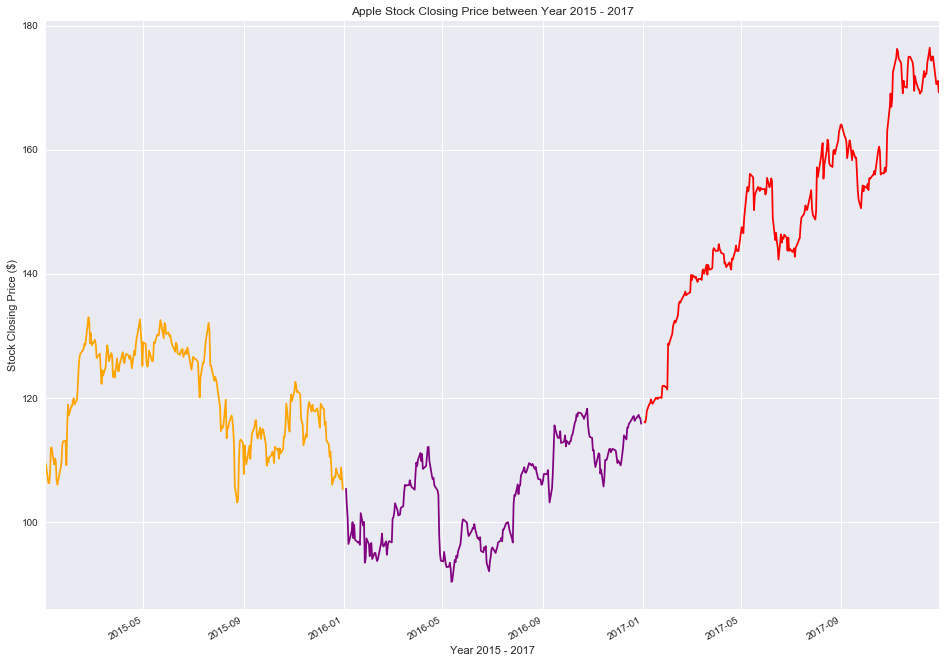

In [26]:
# Create Multi-year color chart closing price for three year range:

stock_2017 = stock_pd.truncate(before=str('2017-01-01'), after=str('2017-12-31'))
stock_2016 = stock_pd.truncate(before=str('2016-01-01'), after=str('2016-12-31'))
stock_2015 = stock_pd.truncate(before=str('2015-01-01'), after=str('2015-12-31'))

stock_2017['close'].plot(figsize=(16, 12), color="red")
stock_2016['close'].plot(figsize=(16, 12), color="purple")
stock_2015['close'].plot(figsize=(16, 12), color="orange")

plt.title("Apple Stock Closing Price between Year 2015 - 2017")
plt.xlabel("Year 2015 - 2017")
plt.ylabel("Stock Closing Price ($)")
plt.show()

In [28]:
# Parse timestamps, reset index to three year range for RSI values:

rsi_pd1 = rsi_pd.sort_values(by='timestamp')
rsi_pd2 = rsi_pd.sort_values(by='timestamp')
rsi_pd3 = rsi_pd.sort_values(by='timestamp')

rsi_pd1.set_index('timestamp', inplace=True)
rsi_pd2.set_index('timestamp', inplace=True)
rsi_pd3.set_index('timestamp', inplace=True)

rsi_2017=rsi_pd1.truncate(before=str('2017-01-01'), after=str('2017-12-31'))
rsi_2016=rsi_pd2.truncate(before=str('2016-01-01'), after=str('2016-12-31'))
rsi_2015=rsi_pd3.truncate(before=str('2015-01-01'), after=str('2015-12-31'))

In [55]:
rsi_2017.head()

,RSI
timestamp,
2017-01-03,55.3174
2017-01-04,55.1781
2017-01-05,55.6929
2017-01-06,56.8044
2017-01-09,57.7009


In [33]:
stock_2017.head()

,close,volume
timestamp,,
2017-01-03,116.15,28781865
2017-01-04,116.02,21118116
2017-01-05,116.61,22193587
2017-01-06,117.91,31751900
2017-01-09,118.99,33561948


In [54]:
# Merge RSI values into close + volume price into dataframe
stock_2017.join(rsi_2017, how= 'inner')
stock_2016.join(rsi_2016, how= 'inner')
stock_2015.join(rsi_2015, how= 'inner')

,close,volume,RSI
timestamp,,,
2015-01-02,109.33,53204626,36.2704
2015-01-05,106.25,64285491,35.4623
2015-01-06,106.26,65797116,35.4671
2015-01-07,107.75,40105934,36.1784
2015-01-08,111.89,59364547,38.1060
2015-01-09,112.01,53315099,38.1611
2015-01-12,109.25,49650790,37.3833
2015-01-13,110.22,67091928,37.8361
2015-01-14,109.80,48956588,37.7160
